In [3]:
import numpy as np
import matplotlib.pyplot as plt
import p
from pycocotools.coco import COCO

In [6]:
data_path = 'E:/download/iFYTEK/x_ray/dataset/coco'

coco_json = f'{data_path}/annotations/fold0/all.json'

In [11]:
coco = COCO(coco_json)

imgIds = coco.getImgIds()
imgIds[:5]

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


[100001, 100002, 100003, 100004, 100005]

In [21]:
img_id = 100008

In [22]:
image_info = coco.loadImgs(ids=img_id)[0]
image_info

{'height': 453, 'width': 937, 'id': 100008, 'filename': '100008.jpg'}

In [23]:
annIds = coco.getAnnIds(imgIds=img_id, iscrowd=None)
ann_info = coco.loadAnns(annIds)
ann_info

[{'image_id': 100008,
  'id': 7,
  'category_id': 3,
  'bbox': [116.0, 223.0, 30.0, 91.0],
  'segmentation': [[116.0, 223.0, 116.0, 314.0, 146.0, 314.0, 146.0, 223.0]],
  'area': 2730.0,
  'iscrowd': 0},
 {'image_id': 100008,
  'id': 8,
  'category_id': 3,
  'bbox': [103.0, 141.0, 59.0, 68.0],
  'segmentation': [[103.0, 141.0, 103.0, 209.0, 162.0, 209.0, 162.0, 141.0]],
  'area': 4012.0,
  'iscrowd': 0},
 {'image_id': 100008,
  'id': 9,
  'category_id': 3,
  'bbox': [123.0, 147.0, 49.0, 67.0],
  'segmentation': [[123.0, 147.0, 123.0, 214.0, 172.0, 214.0, 172.0, 147.0]],
  'area': 3283.0,
  'iscrowd': 0}]

## image information

In [28]:
imgIds = coco.getImgIds()

hs, ws, areas = [], [], []

for img_id in imgIds:
    image_info = coco.loadImgs(ids=img_id)[0]
    h = image_info['height']
    w = image_info['width']
    image_area = w * h
    hs.append(h)
    ws.append(w)
    areas.append(image_area)

hs = np.array(hs)
ws = np.array(ws)
areas = np.array(areas)

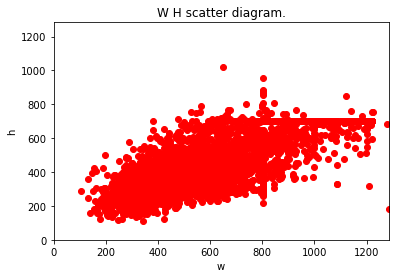

In [32]:
import matplotlib.pyplot as plt
plt.title("W H scatter diagram.")
max_size = max(max(ws), max(hs))
plt.xlim(xmax=max_size,xmin=0)
plt.ylim(ymax=max_size,ymin=0)
plt.xlabel("w")
plt.ylabel("h")
plt.plot(ws,hs,'ro')
plt.show()

In [33]:
image_ann = dict()
for img_id in imgIds:
    annIds = coco.getAnnIds(imgIds=img_id, iscrowd=None)
    ann_info = coco.loadAnns(annIds)
    image_ann[img_id] = ann_info


In [34]:
image_ann

{100001: [{'image_id': 100001,
   'id': 0,
   'category_id': 3,
   'bbox': [240.0, 88.0, 66.0, 36.0],
   'segmentation': [[240.0, 88.0, 240.0, 124.0, 306.0, 124.0, 306.0, 88.0]],
   'area': 2376.0,
   'iscrowd': 0}],
 100002: [{'image_id': 100002,
   'id': 1,
   'category_id': 3,
   'bbox': [75.0, 52.0, 38.0, 36.0],
   'segmentation': [[75.0, 52.0, 75.0, 88.0, 113.0, 88.0, 113.0, 52.0]],
   'area': 1368.0,
   'iscrowd': 0}],
 100003: [{'image_id': 100003,
   'id': 2,
   'category_id': 3,
   'bbox': [220.0, 146.0, 69.0, 17.0],
   'segmentation': [[220.0, 146.0, 220.0, 163.0, 289.0, 163.0, 289.0, 146.0]],
   'area': 1173.0,
   'iscrowd': 0}],
 100004: [{'image_id': 100004,
   'id': 3,
   'category_id': 5,
   'bbox': [52.0, 213.0, 187.0, 166.0],
   'segmentation': [[52.0, 213.0, 52.0, 379.0, 239.0, 379.0, 239.0, 213.0]],
   'area': 31042.0,
   'iscrowd': 0}],
 100005: [{'image_id': 100005,
   'id': 4,
   'category_id': 3,
   'bbox': [479.0, 79.0, 69.0, 41.0],
   'segmentation': [[479.0, 7

In [36]:
ann_count = [len(v) for k, v in image_ann.items()]